<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/heartAttackPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Description;
age - in years

  sex - (1 = male; 0 = female)

  cp - chest pain type (typical, asymptotic, nonanginal, nontypical)

  trestbps - resting blood pressure (in mm Hg on admission to the hospital)

  chol - serum cholestoral in mg/dl

  fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

  restecg - resting electrocardiographic results

  thalach - maximum heart rate achieved

  exang - exercise induced angina (1 = yes; 0 = no)

  oldpeak - ST depression induced by exercise relative to rest

  slope - the slope of the peak exercise ST segment

  ca - number of major vessels (0-3) colored by flourosopy

  thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

  target - have disease or not (1=yes, 0=no)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math
import os
style.use('ggplot')

In [ ]:
os.chdir('sample_data')

In [ ]:
heart = pd.read_csv('heartHealth.csv')
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
print(f"Number of Null values are: {[val for val in heart.isnull().sum().values]}")

Number of Null values are: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# EDA of 1025 Heart Disease Sample data

In [ ]:
print(f"The number of records or samples are = {heart.shape[0]}, and the number of columns are = {heart.shape[1]}")

The number of records are = 1025, and the number of columns are = 14


In [ ]:
heart.describe().round(2).T[['count', 'mean', 'min', 'max']]

,count,mean,min,max
age,1025.0,54.43,29.0,77.0
sex,1025.0,0.70,0.0,1.0
cp,1025.0,0.94,0.0,3.0
trestbps,1025.0,131.61,94.0,200.0
chol,1025.0,246.00,126.0,564.0
fbs,1025.0,0.15,0.0,1.0
restecg,1025.0,0.53,0.0,2.0
thalach,1025.0,149.11,71.0,202.0
exang,1025.0,0.34,0.0,1.0
oldpeak,1025.0,1.07,0.0,6.2


In [ ]:
# Styling overwrites rounding
heart.describe().round(2).T.style.set_table_styles([{
    'selector':'',
    'props':[(
        'border', '5px solid tomato'
    )]
}])

,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.430000,9.070000,29.000000,48.000000,56.000000,61.000000,77.000000
sex,1025.000000,0.700000,0.460000,0.000000,0.000000,1.000000,1.000000,1.000000
cp,1025.000000,0.940000,1.030000,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,1025.000000,131.610000,17.520000,94.000000,120.000000,130.000000,140.000000,200.000000
chol,1025.000000,246.000000,51.590000,126.000000,211.000000,240.000000,275.000000,564.000000
fbs,1025.000000,0.150000,0.360000,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,1025.000000,0.530000,0.530000,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,1025.000000,149.110000,23.010000,71.000000,132.000000,152.000000,166.000000,202.000000
exang,1025.000000,0.340000,0.470000,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,1025.000000,1.070000,1.180000,0.000000,0.000000,0.800000,1.800000,6.200000


In [ ]:
heart.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.43,9.07,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.70,0.46,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.94,1.03,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.61,17.52,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.00,51.59,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.53,0.53,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.11,23.01,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.34,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.07,1.18,0.0,0.0,0.8,1.8,6.2


In [ ]:
for col in heart.columns:
    print(col,"unique values are ==>", heart.loc[:, col].unique(),"\n")

age unique values are ==> [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74] 

sex unique values are ==> [1 0] 

cp unique values are ==> [0 1 2 3] 

trestbps unique values are ==> [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101] 

chol unique values are ==> [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237

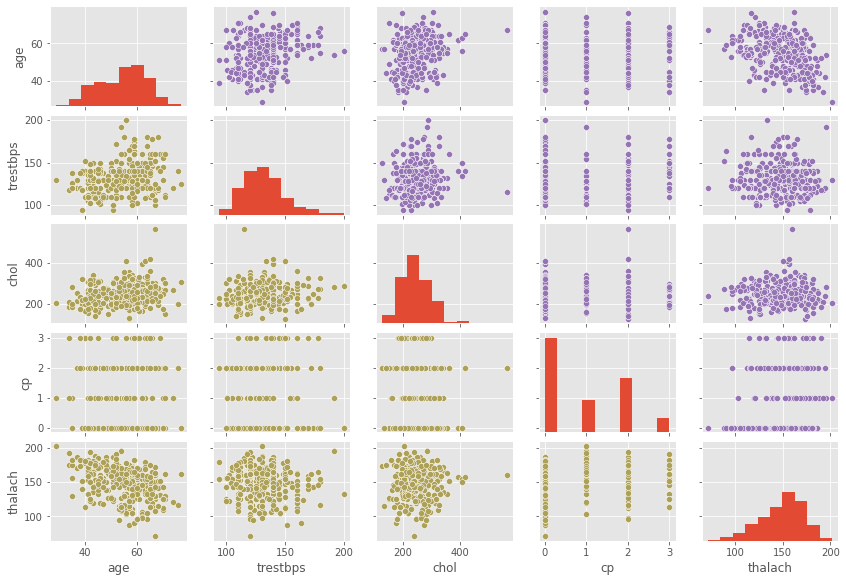

In [ ]:
# Cholesterol versus age, blood pressure versus age and Maximum heart rate versus age
chart = sns.PairGrid(heart[['age', 'trestbps', 'chol', 'cp', 'thalach']])
fig = plt.gcf()

fig.set_size_inches(12,8)
chart.map_upper(sns.scatterplot, color = '#9574B3')
chart.map_lower(sns.scatterplot, color = '#ADA057')
chart.map_diag(plt.hist, color = '#E34A33')
sns.set()
plt.show()

In [ ]:
# Chest Pain counts per category
cp_cat = list(heart['cp'].unique())
labels = ['typical', 'asymptotic', 'nonanginal', 'nontypical']

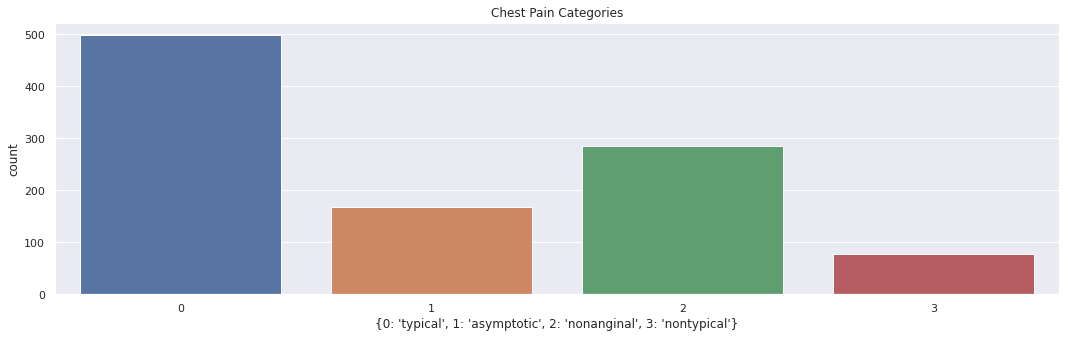

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x = 'cp', data=heart).set(title='Chest Pain Categories', xlabel = dict(zip(cp_cat, labels)))
plt.show()

In [ ]:
heart['cp'].replace(dict(zip(cp_cat, labels)), inplace=True)
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,asymptotic,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,typical,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,typical,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,typical,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,typical,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
heart['cp'].replace(dict(zip(labels, cp_cat)), inplace=True)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


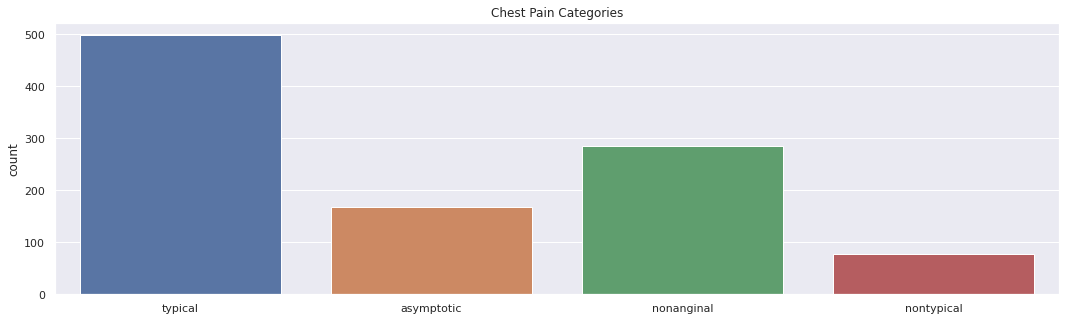

In [ ]:
# Or replace CP with its labels and revert back post plot
heart['cp'].replace(dict(zip(cp_cat, labels)), inplace=True)
plt.figure(figsize=(18,5))
sns.countplot(x = 'cp', data=heart).set(title='Chest Pain Categories', xlabel='')
plt.show()
heart['cp'].replace(dict(zip(labels, cp_cat)), inplace=True)

## Chest Pain Distribution

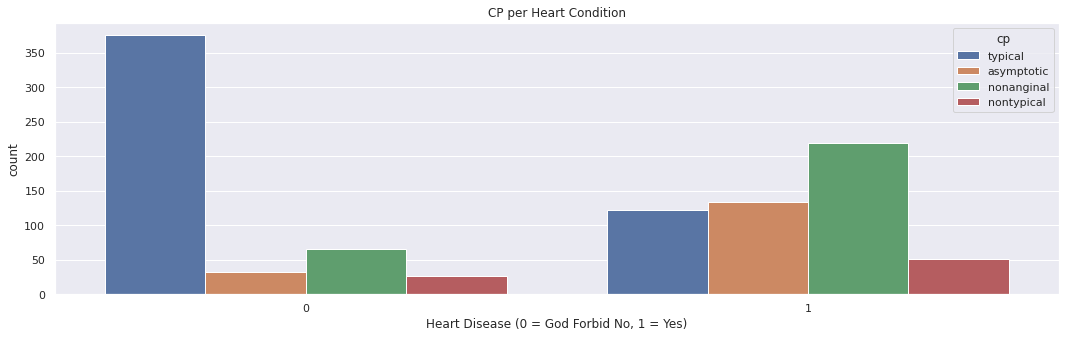

In [ ]:
# with chest pain Yes or No
heart['cp'].replace(dict(zip(cp_cat, labels)), inplace=True)
plt.figure(figsize=(18,5))
sns.countplot(x = 'target', hue='cp', data=heart).set(
    title='CP per Heart Condition', xlabel = 'Heart Disease (0 = God Forbid No, 1 = Yes)'
)
plt.show()

heart['cp'].replace(dict(zip(labels, cp_cat)), inplace=True)

##### Creating Age Group using Pandas method (pd.cut())

In [ ]:
# break down the age group into 10 years range bins using pd.cut
heart['age_grp'] = pd.cut(heart['age'], bins=[0,10,20,30,40,50,60,70,80,90,100, 110], 
       labels=['kids', 'teens','twenys','thirys','forys','fiftys','sixtys','sevenys','eightys','ninys', 'centurians']) 

heart = heart[['age', 'age_grp', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
heart[100:106]

,age,age_grp,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
100,43,forys,0,2,122,213,0,1,165,0,0.2,1,0,2,1
101,57,fiftys,1,2,150,126,1,1,173,0,0.2,2,1,3,1
102,54,fiftys,1,1,108,309,0,1,156,0,0.0,2,0,3,1
103,47,forys,1,2,138,257,0,0,156,0,0.0,2,0,2,1
104,52,fiftys,1,3,118,186,0,0,190,0,0.0,1,0,1,1
105,47,forys,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [ ]:
print(f"The number of people over seveny with no heart problem is = {heart.loc[(heart['age']>70) & (heart['target']==0), :].shape[0]}, and those with heart problem are numbered = {heart.loc[(heart['age']>70) & (heart['target']==1), :].shape[0]}")

The number of people over seveny with no heart problem is = 3, and those with heart problem are numbered = 17


## Chest Pain per Age Group

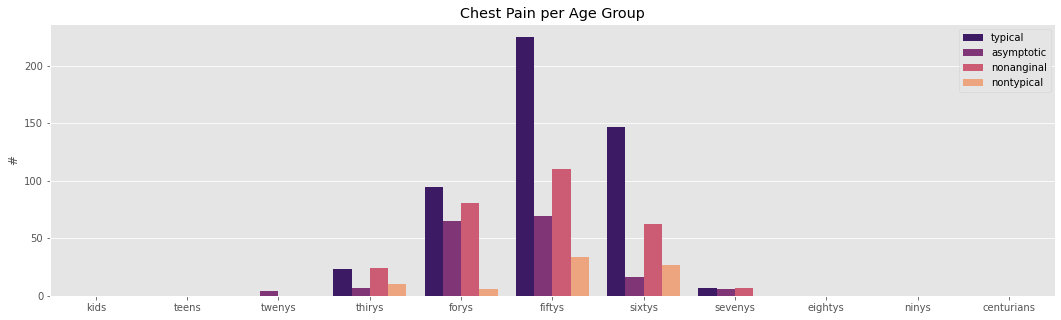

In [ ]:
heart['cp'].replace(dict(zip(cp_cat, labels)), inplace=True)

plt.figure(figsize=(18,5))
chart = sns.countplot(x='age_grp', hue='cp', data=heart, palette='magma')
chart.set_title('Chest Pain per Age Group')
chart.legend(fontsize=10, bbox_to_anchor=(0.9,1))
chart.set_xlabel('')
chart.set_ylabel('#')


heart['cp'].replace(dict(zip(labels, cp_cat)), inplace=True)


## Heart Disease per Age Group

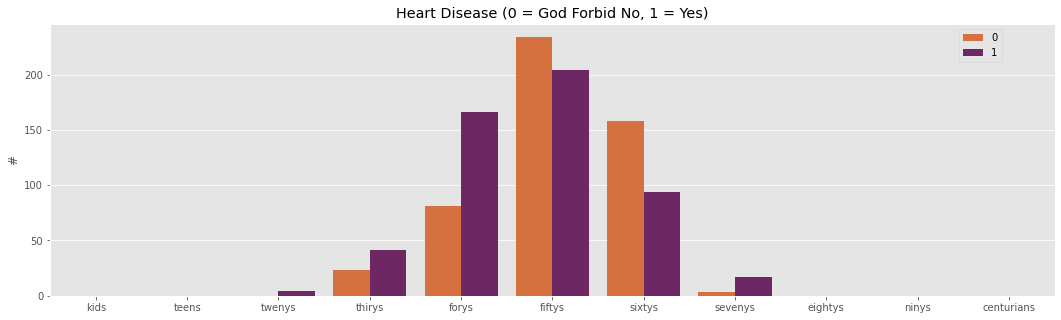

In [ ]:
heart['cp'].replace(dict(zip(cp_cat, labels)), inplace=True)

plt.figure(figsize=(18,5))
chart = sns.countplot(x='age_grp', hue='target', data=heart, palette='inferno_r')
chart.set_title('Heart Disease (0 = God Forbid No, 1 = Yes)')
chart.legend(fontsize=10, bbox_to_anchor=(0.9,1))
chart.set_xlabel('')
chart.set_ylabel('#')

heart['cp'].replace(dict(zip(labels, cp_cat)), inplace=True)


## Fasting Blood Level per Age Group

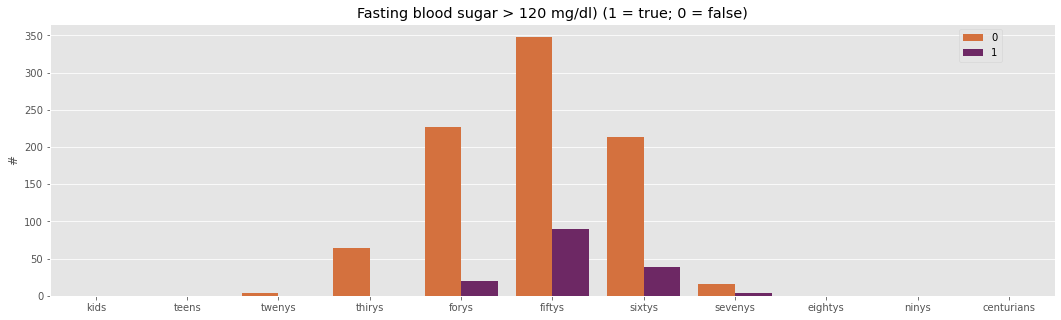

In [ ]:
heart['cp'].replace(dict(zip(cp_cat, labels)), inplace=True)

plt.figure(figsize=(18,5))
chart = sns.countplot(x='age_grp', hue='fbs', data=heart, palette='inferno_r')
chart.set_title('Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
chart.legend(fontsize=10, bbox_to_anchor=(0.9,1))
chart.set_xlabel('')
chart.set_ylabel('#')

heart['cp'].replace(dict(zip(labels, cp_cat)), inplace=True)


## Blood Pressure Distribution per Age Group

#### 'Sharex=True'  Bug or no Bug?

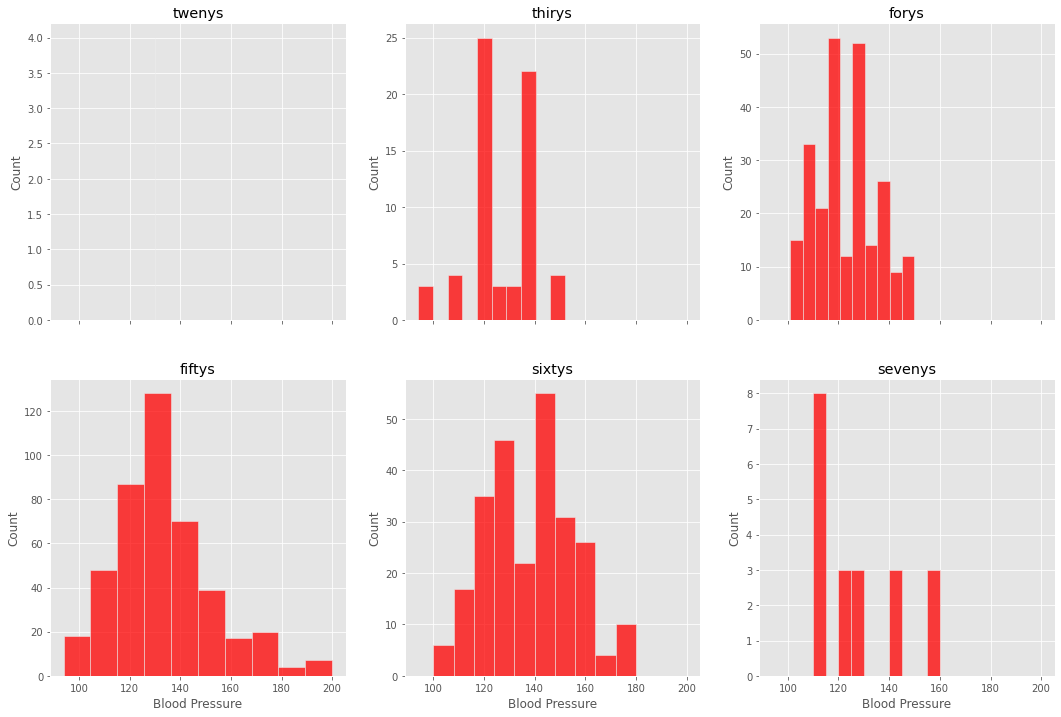

In [ ]:
"""For some Reason sharex = True is interfering with the histogram plot so if I enable sharex=True, it doesnt plot twenys or the first
 in the list see the difference in the next cell for comparison"""
chart, axs = plt.subplots(2, 3, figsize=(18,12), sharex=True)
k = 0
for i in range(2):
  for j in range(3):
    distro = heart.groupby('age_grp').get_group(heart['age_grp'].unique().sort_values()[k])
    sns.histplot(distro['trestbps'], bins=10, ax = axs[i,j], color='red')
    axs[i,j].set_title(f"{heart['age_grp'].unique().sort_values()[k]}")
    axs[i,j].set_xlabel('Blood Pressure')
    k+=1


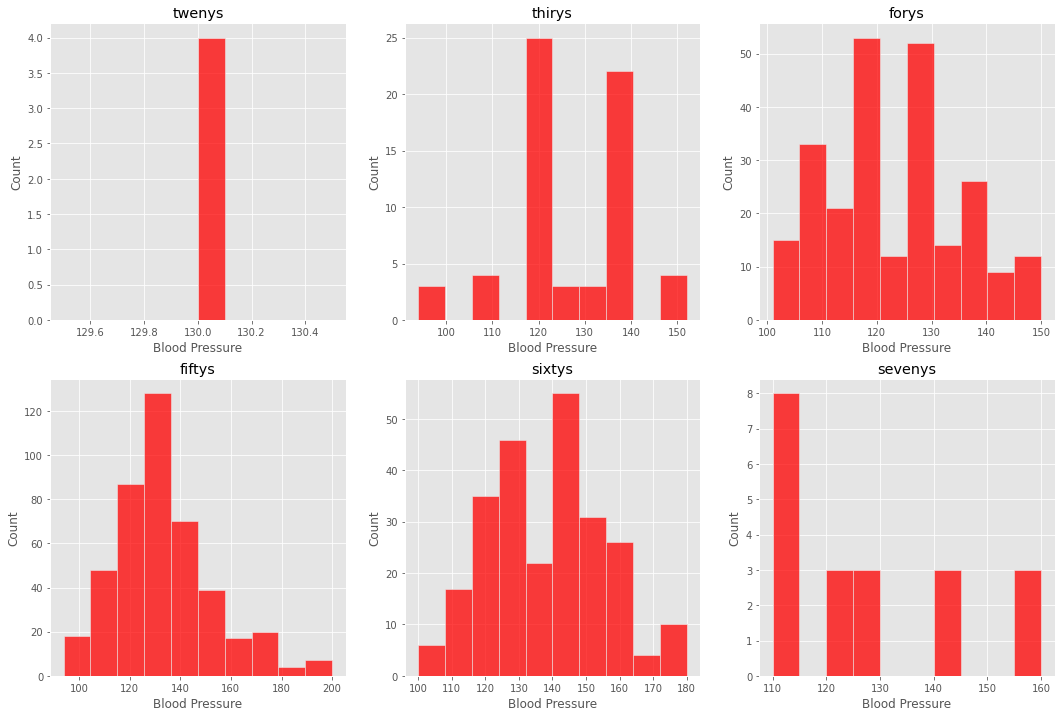

In [ ]:
"""sharex = False shows the correct plots"""
chart, axs = plt.subplots(2, 3, figsize=(18,12), sharex=False)
k = 0
for i in range(2):
  for j in range(3):
    distro = heart.groupby('age_grp').get_group(heart['age_grp'].unique().sort_values()[k])
    sns.histplot(distro['trestbps'], bins=10, ax = axs[i,j], color='red')
    axs[i,j].set_title(f"{heart['age_grp'].unique().sort_values()[k]}")
    axs[i,j].set_xlabel('Blood Pressure')
    k+=1


## Cholestrol Distribution per Age Group

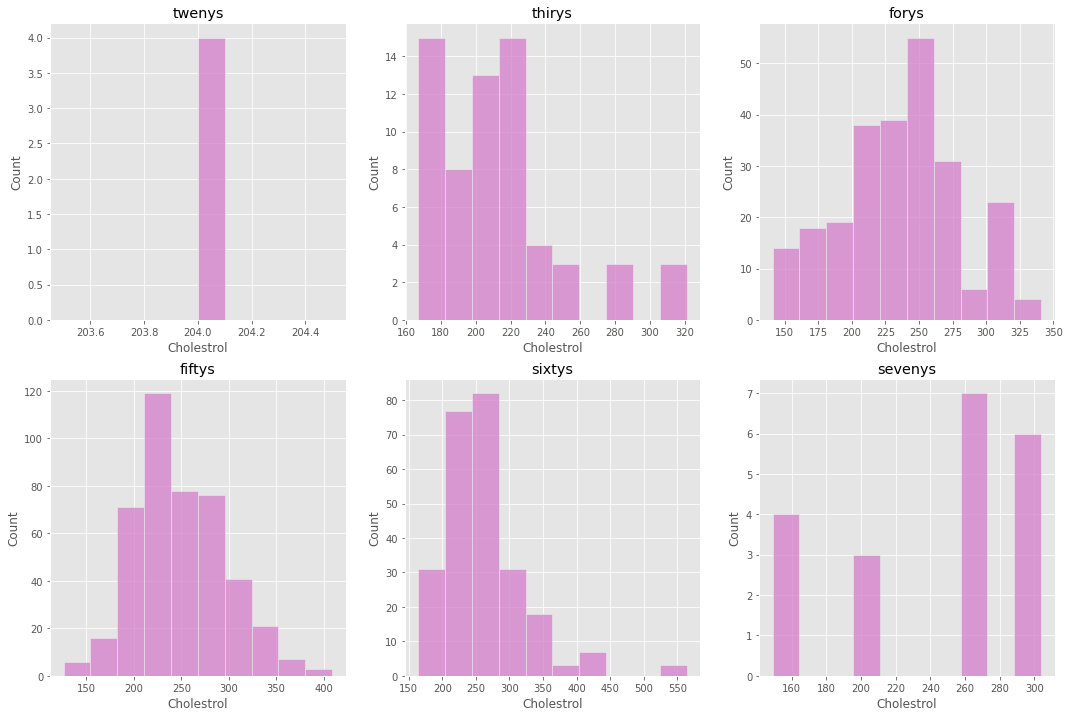

In [ ]:
chart, axs = plt.subplots(2, 3, figsize=(18,12), sharex=False)
k = 0
for i in range(2):
  for j in range(3):
    distro = heart.groupby('age_grp').get_group(heart['age_grp'].unique().sort_values()[k])
    sns.histplot(distro['chol'], bins=10, ax = axs[i,j], color='#D47DCB')
    axs[i,j].set_title(f"{heart['age_grp'].unique().sort_values()[k]}")
    axs[i,j].set_xlabel('Cholestrol')
    k+=1
# heart.groupby('age_grp').get_group(heart['age_grp'].unique().sort_values()[0])

## Correlation between the Target and features
The darker the boxes are or a box value is closer to 1 then the variables are highly correlated. Therefore, 'target' is highly correlated with 
<br>cp - chest pain
<br>thalach - maximum heart rate achieved
<br>slope - the slope of the peak exercise ST segment
<br>restecg - resting electrocardiographic results, in that order. 
<br>See below.

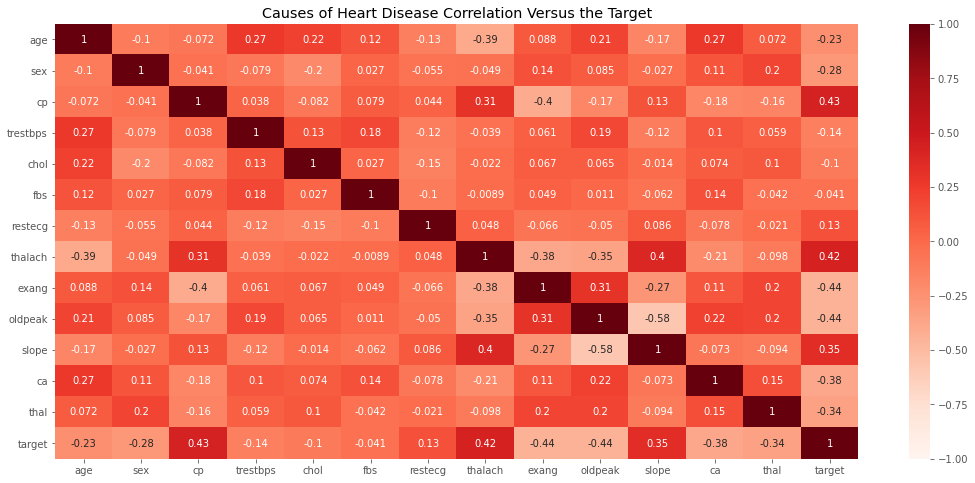

In [ ]:
plt.figure(figsize=(18,8))
chart = sns.heatmap(heart.corr(), annot=True, vmin=-1, cmap='Reds', linecolor='k')
chart.set_title('Causes of Heart Disease Correlation Versus the Target')
plt.show()

# Machine Learning: K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
X = heart.drop(['age_grp','target'], axis=1)
y = heart['target']

In [ ]:
kf = KFold(n_splits=10, shuffle= True, random_state=1)

#### **Cross Validation from Scratch**

In [ ]:
def accuracy_scorer(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  return clf.score(X_test, y_test)

In [ ]:
np.mean([83, 88, 87])
      print(100*accuracy_scorer(svm.SVC(kernel= kernel), X_train, X_test, y_train, y_test))

86.0

In [ ]:
# SVM with its kernels='poly', 'rbf', 'sigmoid', 'linear'
svm_kernels = ['poly', 'rbf', 'sigmoid', 'linear']
kfold_avg = []
for kernel in svm_kernels:
  kfold_score = []
  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      kfold_score.append(100*accuracy_scorer(svm.SVC(kernel= kernel), X_train, X_test, y_train, y_test))
  kfold_avg.append(np.mean(kfold_score))
print(kfold_avg)

[70.24842946887493, 70.64344184275653, 53.94726822767942, 84.49267085474966]


In [ ]:
#Linear Regression
linreg_score =[]
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  linreg_score.append(100*accuracy_scorer(LinearRegression(), X_train, X_test, y_train, y_test))
print(linreg_score,"\n", "The accuracy score for LinReg is:", np.mean(linreg_score))

[52.1109278775873, 42.33399540322181, 49.08883610263632, 44.95660137191813, 58.8343704553236, 50.51304641542722, 53.55704664869086, 49.156654134134534, 53.845716036257116, 46.131110676055684] 
 The accuracy score for LinReg is: 50.05283051212526


#### **Using Make Pipline Scaler and Logistic Regression**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
# standard Scaler
logreg_score =[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  logreg_score.append(100*accuracy_scorer(pipe, X_train, X_test, y_train, y_test))
print(logreg_score,"\n", "The accuracy score for logReg is:", np.mean(logreg_score))

[84.46601941747572, 80.58252427184466, 84.46601941747572, 83.49514563106796, 91.2621359223301, 81.37254901960785, 88.23529411764706, 85.29411764705883, 83.33333333333334, 80.3921568627451] 
 The accuracy score for logReg is: 84.28992956405864


In [ ]:
# Using MinMax Scaler
pipe = make_pipeline(MinMaxScaler(), LogisticRegression())
logreg_score =[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  logreg_score.append(100*accuracy_scorer(pipe, X_train, X_test, y_train, y_test))
print(logreg_score,"\n", "The accuracy score for logReg is:", np.mean(logreg_score))

[82.52427184466019, 76.69902912621359, 85.43689320388349, 79.6116504854369, 90.29126213592234, 83.33333333333334, 88.23529411764706, 86.27450980392157, 84.31372549019608, 81.37254901960785] 
 The accuracy score for logReg is: 83.80925185608223


##### **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm_list=[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  cm_list.append(cm)


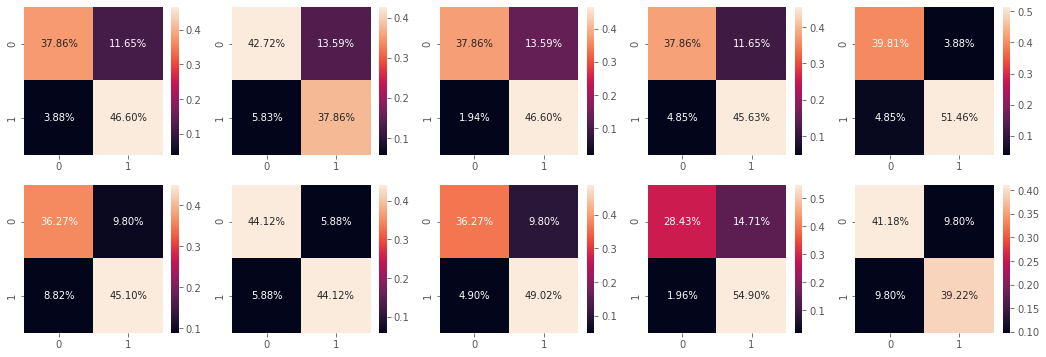

In [ ]:
chart, axs = plt.subplots(2, 5, figsize=(18,6), sharex=False)
k = 0
for i in range(2):
  for j in range(5):
    sns.heatmap(cm_list[k]/np.sum(cm_list[k]), annot=True, fmt='.2%', ax = axs[i,j])
    k+=1

In [ ]:
print(f"True Positive (1/1) + True Negative(0/0) from confusion matrix above will give the same score in logreg.score \n{logreg_score}")

True Positive (1/1) + True Negative(0/0) from confusion matrix above will give the same score in logreg.score 
[84.46601941747572, 80.58252427184466, 84.46601941747572, 83.49514563106796, 91.2621359223301, 81.37254901960785, 88.23529411764706, 85.29411764705883, 83.33333333333334, 80.3921568627451]


#### **Direct Scaling/Preprocessing without Piping using svm.SVC(kernel='sigmoid')**

In [ ]:
mm = MinMaxScaler()
ma = MaxAbsScaler()
ro = RobustScaler()

In [ ]:
def predictor(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return accuracy_score(y_test, y_pred)

#### **MinMaxScaler**

In [ ]:

scaled_logreg_score =[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  X_train_scaled = mm.fit_transform(X_train)
  X_test_scaled = mm.transform(X_test)
  scaled_logreg_score.append(100*predictor(svm.SVC(kernel='linear'), X_train_scaled, X_test_scaled, y_train, y_test))
print(scaled_logreg_score,"\n", "The accuracy score for MinMax scaled data with logReg is:", np.mean(scaled_logreg_score))

[80.58252427184466, 77.66990291262135, 84.46601941747572, 79.6116504854369, 88.3495145631068, 84.31372549019608, 90.19607843137256, 83.33333333333334, 84.31372549019608, 82.35294117647058] 
 The accuracy score for MinMax scaled data with logReg is: 83.51894155720541


#### **MaxAbsScaler**

In [ ]:
scaled_logreg_score =[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  X_train_scaled = ma.fit_transform(X_train)
  X_test_scaled = ma.transform(X_test)
  scaled_logreg_score.append(100*predictor(svm.SVC(kernel='linear'), X_train_scaled, X_test_scaled, y_train, y_test))
print(scaled_logreg_score,"\n", "The accuracy score for MinMax scaled data with logReg is:", np.mean(scaled_logreg_score))

[80.58252427184466, 79.6116504854369, 84.46601941747572, 79.6116504854369, 89.32038834951457, 84.31372549019608, 88.23529411764706, 86.27450980392157, 84.31372549019608, 82.35294117647058] 
 The accuracy score for MinMax scaled data with logReg is: 83.90824290881402


#### **RobustScaler**
---
#####* Robust scaler with svm.SVC(kernel='linear') provides the best result @ 84.5% accuracy*

In [ ]:
scaled_logreg_score =[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  X_train_scaled = ro.fit_transform(X_train)
  X_test_scaled = ro.transform(X_test)
  scaled_logreg_score.append(100*predictor(svm.SVC(kernel='linear'), X_train_scaled, X_test_scaled, y_train, y_test))
print(scaled_logreg_score,"\n", "The accuracy score for MinMax scaled data with logReg is:", np.mean(scaled_logreg_score))

[83.49514563106796, 79.6116504854369, 83.49514563106796, 80.58252427184466, 91.2621359223301, 83.33333333333334, 91.17647058823529, 84.31372549019608, 84.31372549019608, 83.33333333333334] 
 The accuracy score for MinMax scaled data with logReg is: 84.49171901770418


##  From sklearn.model_selection import Cross Val Score 
---
##### With one line of code

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score = cross_val_score(svm.SVC(kernel='linear'), X, y, cv=10)
print(np.mean(cv_score))

0.8408623643632211
